In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results

In [10]:
import os, shutil
original_dataset_dir = '/content/drive/MyDrive/AML/Kaggle_original_data/train'

base_dir = '/content/drive/MyDrive/AML/cats_and_dogs_random'
#os.mkdir(base_dir)

### Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

### Directory with training cat pictures

train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)

### Directory with training dog pictures

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

### Directory with val cat pictures

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

### Directory with val dog pictures

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

### Directory with test cat pictures

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

### Directory with val Dog pictures

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

### Copies the 2,000 cat images to train_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(3000,5000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
  #shutil.copyfile(src, dst)

### Copies the 1000 cat images to validation_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  #shutil.copyfile(src, dst)

### Copies the 1000 cat images to test_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  #shutil.copyfile(src, dst)


### Copies the 2,000 dog images to train_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(3000, 5000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  #shutil.copyfile(src, dst)

### Copies the 1000 dog images to validation_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  #shutil.copyfile(src, dst)

### Copies the 1000 dog images to test_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  #shutil.copyfile(src, dst)



#### let’s count how many pictures are in each training split 

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 2000
total training dog images: 2000
total validation cat images: 1000
total validation dog images: 1000
total test cat images: 1000
total test dog images: 1000



#### Defining a convnet for dogs vs. cats classification which includes dropout

In [12]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Let’s look at how the dimensions of the feature maps change with every 
## successive layer:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

####Configuring the model for training

In [13]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(learning_rate = 1e-4),
  metrics=['acc'])

####Let’s train the network using data augmentation and dropout.

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=64,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=64,
  class_mode='binary')

history = model.fit (
train_generator,
steps_per_epoch=62,
epochs=100,
validation_data=validation_generator,
validation_steps=31)
model.save('cats_and_dogs_small_03.h5')

Found 4000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 296s 5s/step - loss: 0.6919 - acc: 0.5188 - val_loss: 0.6764 - val_acc: 0.5902
Epoch 2/100
62/62 [==============================] - 47s 769ms/step - loss: 0.6785 - acc: 0.5638 - val_loss: 0.6595 - val_acc: 0.6144
Epoch 3/100
62/62 [==============================] - 47s 764ms/step - loss: 0.6649 - acc: 0.5841 - val_loss: 0.6443 - val_acc: 0.6134
Epoch 4/100
62/62 [==============================] - 46s 736ms/step - loss: 0.6563 - acc: 0.6090 - val_loss: 0.6305 - val_acc: 0.6396
Epoch 5/100
62/62 [==============================] - 45s 734ms/step - loss: 0.6434 - acc: 0.6242 - val_loss: 0.6312 - val_acc: 0.6396
Epoch 6/100
62/62 [==============================] - 47s 763ms/step - loss: 0.6378 - acc: 0.6329 - val_loss: 0.6122 - val_acc: 0.6583
Epoch 7/100
62/62 [==============================] - 46s 749ms/step - loss: 0.6251 - acc: 0.6466 - val_loss: 0.611

 #### Plotting the results

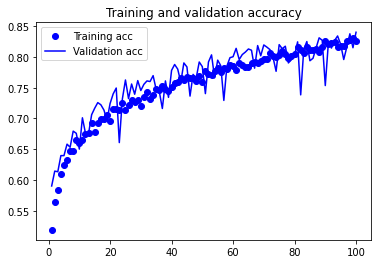

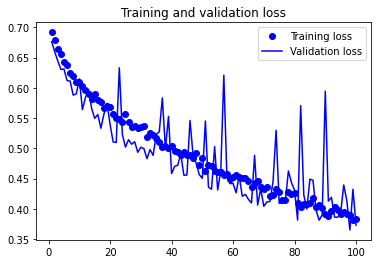

In [15]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# validation accuracy 84
# Training accuracy  ~83
# Validation Loss ~0.36
# Training Loss ~0.38



###4. Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 for the pretrained network may be the same or different from those using the network where you trained from scratch. Again, use any and all optimization techniques to get best performance

####Using pretrained convnet(VGG16)

In [16]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

####Extracting features using the pretrained convolutional base


In [18]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/drive/MyDrive/AML/cats_and_dogs_random'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
      directory,
      target_size=(150, 150),
      batch_size=batch_size,
      class_mode='binary')
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4* 512))
validation_features = np.reshape(validation_features, (1000, 4*4* 512))
test_features = np.reshape(test_features, (1000, 4*4* 512))

Found 4000 images belonging to 2 classes.
1/1 [==============================] - 0s 32ms/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 32ms/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 24ms/step


#### Defining and training the densely connected classifier

In [19]:
from keras import models
from keras import layers
from keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))


Epoch 1/30
100/100 [==============================] - 1s 8ms/step - loss: 0.6006 - acc: 0.6625 - val_loss: 0.4530 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 1s 5ms/step - loss: 0.4220 - acc: 0.8180 - val_loss: 0.3812 - val_acc: 0.8490
Epoch 3/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3692 - acc: 0.8380 - val_loss: 0.3429 - val_acc: 0.8600
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.3335 - acc: 0.8545 - val_loss: 0.3254 - val_acc: 0.8670
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.2952 - acc: 0.8770 - val_loss: 0.3067 - val_acc: 0.8690
Epoch 6/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2777 - acc: 0.8825 - val_loss: 0.2953 - val_acc: 0.8740
Epoch 7/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2601 - acc: 0.8975 - val_loss: 0.2858 - val_acc: 0.8770
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

In [20]:
model.save('cats_and_dogs_small_03_pretrained.h5')

 #### Plotting the results

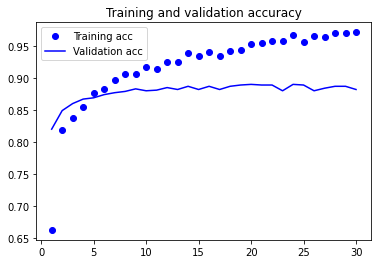

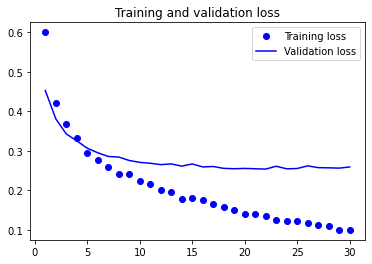

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# validation accuracy ~89
# Training accuracy  ~97
# Validation Loss ~0.25
# Training Loss ~0.09

